In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


In [2]:
(train_data,train_label),(test_data,test_label)=mnist.load_data()

print(f'The Train Data shape : {train_data.shape}')
print(f'The Test Data shape : {test_data.shape}')

The Train Data shape : (60000, 28, 28)
The Test Data shape : (10000, 28, 28)


In [3]:
train_data = train_data.reshape(-1,28,28,1).astype('float32')/255
test_data = test_data.reshape(-1,28,28,1).astype('float32')/255

In [4]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [5]:
train_data,val_data,train_label,val_label=train_test_split(train_data,train_label,test_size=0.25,random_state=13)

In [6]:
train_datagen=ImageDataGenerator(rotation_range=15 , 
                             width_shift_range=0.2 , 
                             height_shift_range=0.2 ,
                             shear_range=0.2 ,
                             zoom_range=0.2 , 
                             data_format='channels_last')


train_datagen.fit(train_data)

LR_function=ReduceLROnPlateau(monitor='val_acc',
                             patience=3,
                             verbose=1,
                             factor=0.5,
                             min_lr=0.00001)

In [7]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [9]:
model.compile(optimizer='Adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [10]:
history = model.fit_generator(train_datagen.flow(train_data,train_label,batch_size=64), 
                              steps_per_epoch=train_data.shape[0]/64 , epochs=100,validation_data=(val_data,val_label),validation_steps=val_data.shape[0]/64,callbacks=[LR_function])

Epoch 1/100
704/703 [==============================] - 13s 19ms/step - loss: 0.8713 - acc: 0.7050 - val_loss: 0.1596 - val_acc: 0.9538
Epoch 2/100
704/703 [==============================] - 10s 15ms/step - loss: 0.3560 - acc: 0.8886 - val_loss: 0.1008 - val_acc: 0.9699
Epoch 3/100
704/703 [==============================] - 10s 15ms/step - loss: 0.2645 - acc: 0.9169 - val_loss: 0.0765 - val_acc: 0.9767
Epoch 4/100
704/703 [==============================] - 10s 15ms/step - loss: 0.2210 - acc: 0.9314 - val_loss: 0.0603 - val_acc: 0.9791
Epoch 5/100
704/703 [==============================] - 10s 15ms/step - loss: 0.1949 - acc: 0.9404 - val_loss: 0.0554 - val_acc: 0.9819
Epoch 6/100
704/703 [==============================] - 10s 15ms/step - loss: 0.1724 - acc: 0.9460 - val_loss: 0.0604 - val_acc: 0.9805
Epoch 7/100
704/703 [==============================] - 10s 15ms/step - loss: 0.1547 - acc: 0.9506 - val_loss: 0.0448 - val_acc: 0.9853
Epoch 8/100
704/703 [==============================] - 

In [11]:
loss,acc=model.evaluate(test_data,test_label)
print(f'The Accuracy on Test Data = {acc}')

10000/10000 [==============================] - 1s 54us/step
The Accuracy on Test Data = 0.9948


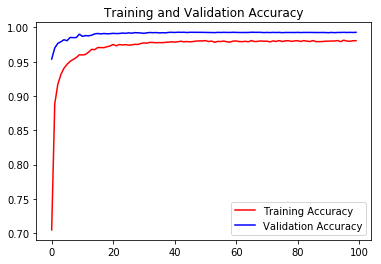

In [12]:
acc = history.history['acc']
loss = history.history['loss']
val_acc=history.history['val_acc']
val_loss=history.history['val_loss']

epochs=range(100)

plt.plot(epochs,acc,'r-',label='Training Accuracy')
plt.plot(epochs,val_acc,'b-',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

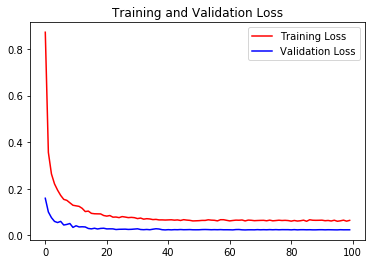

In [13]:
plt.plot(epochs,loss,'r-',label='Training Loss')
plt.plot(epochs,val_loss,'b-',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()